# readme
descrip: plot global av steric height time series for Sunway runs

update history: <br>
v1.0 DL 2021Mar30 <br>
v1.1 DL 2021Apr05 <br>
v1.2 DL 2021Apr25 <br>
v1.3 DL 2021May06 make publication-ready pics <br>

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
# import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
# import cartopy.crs as ccrs
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xesmf as xe

# from eofs.xarray import Eof

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.73.3.109:45310")
client

Client Scheduler: tcp://10.73.3.109:45310 Dashboard: http://10.73.3.109:8787/status,Cluster Workers: 10 Cores: 10 Memory: 210.00 GB


In [3]:
indir = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
         'data_after_manipulation/RegionalStericHeight/test_2021Apr20/')
chunk_size_HR = {'nlat':800,'nlon':900}
chunk_size_LR = {'nlat':384,'nlon':320}
outdir='/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'YrGlobalStericHeightTimeSeries_2021May02.png'

control HR (CH)

In [4]:
case_CH = 'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02'
infiles_CH = [indir + case_CH + '/' + case_CH + '.pop.h.0RegionalStericHeight_'+ str(iyr) + 'av_2021Apr15.nc' 
               for iyr in np.arange(250,299+1)]
infiles_sp_CH=[(indir + case_CH + '/' + case_CH + '.pop.h.0_RegionalStericHeight_300-399_2021Apr24.nc'),
            (indir + case_CH + '/' + case_CH + '.pop.h.0_RegionalStericHeight_400-500_2021Apr24.nc')]
# infiles_sp
infiles_CH.extend(infiles_sp_CH)
ds_CH = xr.open_mfdataset(infiles_CH, compat="override", combine="by_coords", data_vars="minimal",
                          coords="minimal", chunks=chunk_size_HR, parallel=True)
ds_CH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time     (time) object 0250-12-31 00:00:00 ... 0500-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(1, 800, 900), meta=np.ndarray>

transient HR (TH)

In [5]:
# HH: (transient) historic HR
case_HH = 'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway'
infiles_HH=[(indir + case_HH + '/' + case_HH + '.pop.h._RegionalStericHeight_1850-1949_2021Apr24.nc'),
            (indir + case_HH + '/' + case_HH + '.pop.h._RegionalStericHeight_1950-2005_2021Apr24.nc')]
# RH: (transient) RCP8.5 HR
case_RH = 'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF'
infiles_RH = [indir + case_RH + '/cmpr_' + case_RH + '.pop.h.RegionalStericHeight_'+ str(iyr) + 'av_2021Apr15.nc' 
               for iyr in np.arange(2006,2079+1)]
infiles_sp_RH = indir + case_RH + '/' + case_RH + '.pop.h._RegionalStericHeight_2080-2100_2021Apr24.nc'
infiles_RH.append(infiles_sp_RH)

infiles_TH = infiles_HH + infiles_RH
# infiles_TH
ds_TH = xr.open_mfdataset(infiles_TH, compat="override", combine="by_coords", data_vars="minimal",
                          coords="minimal", chunks=chunk_size_HR, parallel=True)
ds_TH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(100, 800, 900), meta=np.ndarray>

In [6]:
infile0_HR = ('/scratch/group/ihesp/archive/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02/ocn/'
              'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0250-01.nc')
ds0_HR = xr.open_dataset(infile0_HR)
ds0_HR

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 1, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 0250-02-01 00:00:00
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat, nlon) float64 ...
    ULAT                (nlat, nlon) float64 ...
    TLONG               (nlat, nlon) float64 ...
    TLAT                (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/87)
    time_bound          (time, d2) object ...
    dz                  (z_t) float32 ...
    dzw                 (z_w) float32 ...
    KMT                 (nlat, nlon) float64 ...
    KMU                 (nlat, nlon) float64 ...
    REGION_MASK         (nlat, nlon) float64 ...
    ...                  ...
    HMXL                (time, nlat, nlon) float32 ...
    XMXL                (time, nlat, nlon) float32 ...
    TMXL                (time, nlat, nlon) float32 ...
    HBLT                (time, nlat, nlon) float32 ...
    XBLT                (time, nlat, nlon) float32 ...
    TBLT                (time, nlat, nlon) float32 ...
Attributes:
    title:           B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-10-05 at 03:26:45.4
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    52176371
    tavg_sum:        2678400.0
    tavg_sum_qflux:  2678400.0

transient LR (TL)

In [7]:
# transient (Historic) LR (HL)
indir_HL = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
'data_after_manipulation/RegionalStericHeight/test/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/')
prefix_HL = 'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.RegionalStericHeight_'
infiles_HL = [indir_HL + prefix_HL + str(iyr) + 'av_2021Apr14.nc' 
               for iyr in np.arange(1850,2005+1)]

# transient (RCP85) LR (RL)
indir_RL = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
'data_after_manipulation/RegionalStericHeight/test/B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF/')
prefix_RL = 'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.RegionalStericHeight_'
infiles_RL1 = [indir_RL + prefix_RL + str(iyr) + 'av_2021Apr14.nc' 
               for iyr in np.arange(2006,2013+1)] # no 2014 yr due to missing 2014-01 nc file
infiles_RL2 = [indir_RL + prefix_RL + str(iyr) + 'av_2021Apr14.nc' 
               for iyr in np.arange(2015,2100+1)]

infiles_TL = infiles_HL + infiles_RL1 + infiles_RL2
ds_TL = xr.open_mfdataset(infiles_TL, compat="override", combine="by_coords", data_vars="minimal",
                          coords="minimal", chunks=chunk_size_LR, parallel=True)
ds_TL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 250)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>

control LR (CL)

In [8]:
indir_CL = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
'data_after_manipulation/RegionalStericHeight/test/B.E.13.B1850C5.ne30g16.sehires38.003.sunway/')
prefix_CL = 'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.0RegionalStericHeight_'
yrs_CL_raw = np.arange(250,500+1)
yrs_CL = np.delete(yrs_CL_raw,[374-250, 398-250, 401-250, 417-250, 445-250])
# yr: 374, 398, 401, 417, 445 have missing monthly data files, do not use them
infiles_CL = [indir_CL + prefix_CL + str(iyr) + 'av_2021Apr14.nc' 
               for iyr in yrs_CL]
ds_CL = xr.open_mfdataset(infiles_CL, compat="override", combine="by_coords", data_vars="minimal",
                          coords="minimal", chunks=chunk_size_LR, parallel=True)
ds_CL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 246)
Coordinates:
  * time     (time) object 0250-12-31 00:00:00 ... 0500-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>

In [9]:
infile0_LR = ('/scratch/group/ihesp/archive/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/ocn/monthly/'
              'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_LR = xr.open_dataset(infile0_LR)
ds0_LR

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nchar: 256, nlat: 384, nlon: 320, time: 1, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates: (12/14)
  * time                  (time) object 1850-02-01 00:00:00
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ...                    ...
    transport_components  (transport_comp, nchar) |S1 ...
    transport_regions     (transport_reg, nchar) |S1 ...
    ULONG                 (nlat, nlon) float64 ...
    ULAT                  (nlat, nlon) float64 ...
    TLONG                 (nlat, nlon) float64 ...
    TLAT                  (nlat, nlon) float64 ...
Dimensions without coordinates: d2, moc_comp, nchar, nlat, nlon, transport_comp, transport_reg
Data variables: (12/137)
    time_bound            (time, d2) object ...
    moc_components        (moc_comp, nchar) |S1 ...
    dz                    (z_t) float32 ...
    dzw                   (z_w) float32 ...
    KMT                   (nlat, nlon) float64 ...
    KMU                   (nlat, nlon) float64 ...
    ...                    ...
    XBLT                  (time, nlat, nlon) float32 ...
    TBLT                  (time, nlat, nlon) float32 ...
    BSF                   (time, nlat, nlon) float32 ...
    MOC                   (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...
    N_HEAT                (time, transport_reg, transport_comp, lat_aux_grid) float32 ...
    N_SALT                (time, transport_reg, transport_comp, lat_aux_grid) float32 ...
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-11 at 22:22:40.9
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  750
    tavg_sum:      2592000.0

# data analysis

In [10]:
h_rst_gl_av_TH = ds_TH.h_rst.weighted(ds0_HR.TAREA).mean(("nlon", "nlat")).compute()
# interpolate_na has trouble with dask array, so I use .compute to make it xarray
h_rst_gl_av_CH = ds_CH.h_rst.weighted(ds0_HR.TAREA).mean(("nlon", "nlat")).compute()
h_rst_gl_av_TL = ds_TL.h_rst.weighted(ds0_LR.TAREA).mean(("nlon", "nlat")).compute()
h_rst_gl_av_CL = ds_CL.h_rst.weighted(ds0_LR.TAREA).mean(("nlon", "nlat")).compute()

h_rst_gl_a_TH = h_rst_gl_av_TH - h_rst_gl_av_TH.isel(time=0) # a: anomaly
h_rst_gl_a_TH = h_rst_gl_a_TH.where(h_rst_gl_a_TH<50, np.nan) # mask spikes as nan
h_rst_gl_a_fn_TH = h_rst_gl_a_TH.interpolate_na(dim="time", method="linear") # fn: fill nan
# fill nan with linear interpolation 
h_rst_gl_a_CH = h_rst_gl_av_CH - h_rst_gl_av_CH.isel(time=0)
h_rst_gl_a_TL = h_rst_gl_av_TL - h_rst_gl_av_TL.isel(time=0) # a: anomaly
h_rst_gl_a_CL = h_rst_gl_av_CL - h_rst_gl_av_CL.isel(time=0) # a: anomaly

In [11]:
# interpolation
yrs_TL = np.arange(1850,2100+1,1)
yrs_TL = yrs_TL[yrs_TL != 2014] # TL miss 2014Jan, so no yr-av for 2014
h_rst_gl_a_intp_TL = np.interp(np.arange(1850,2100+1,1),yrs_TL,h_rst_gl_a_TL.values)
h_rst_gl_a_intp_CL = np.interp(yrs_CL_raw,yrs_CL,h_rst_gl_a_CL.values)

# make pics

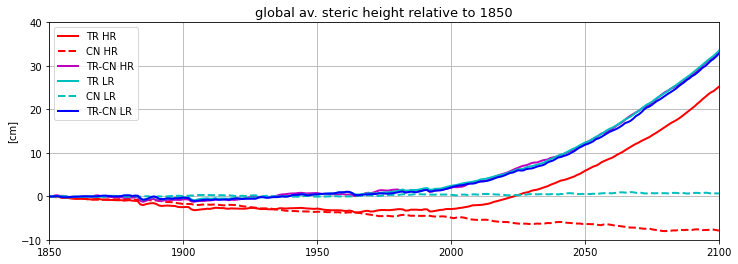

In [12]:
fig1, axs = plt.subplots(1,1,figsize=(12,4))
axs.plot(np.arange(1850,2100+1,1), h_rst_gl_a_fn_TH, color='r', 
         linewidth=2, label='TR HR')
axs.plot(np.arange(1850,2100+1,1), h_rst_gl_a_CH, color='r', linestyle='dashed', 
         linewidth=2, label='CN HR')
axs.plot(np.arange(1850,2100+1,1), (h_rst_gl_a_fn_TH.values-h_rst_gl_a_CH.values), 
         color='m', linewidth=2, label='TR-CN HR')
axs.plot(np.arange(1850,2100+1,1), h_rst_gl_a_intp_TL, color='c', 
         linewidth=2, label='TR LR')
axs.plot(np.arange(1850,2100+1,1), h_rst_gl_a_intp_CL, color='c', 
         linewidth=2, linestyle='dashed',label='CN LR')
axs.plot(np.arange(1850,2100+1,1), (h_rst_gl_a_intp_TL-h_rst_gl_a_intp_CL), 
         color='b', linewidth=2, label='TR-CN LR')

axs.set_xlim([1850,2100])
axs.set_ylim([-10,40])
axs.set_ylabel('[cm]')
axs.set_title('global av. steric height relative to 1850', fontsize=13)
axs.grid()
plt.legend(loc="upper left",frameon=True)

fig1.savefig(pic1,bbox_inches='tight')

# Appendix
check fill nan

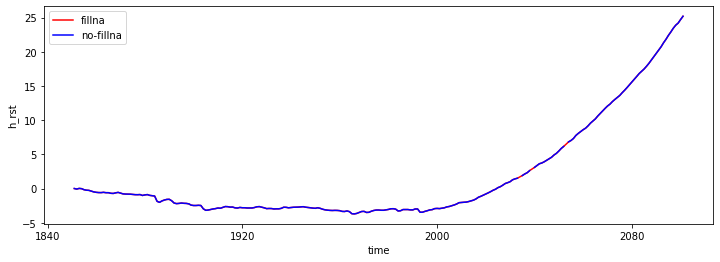

In [10]:
fig, axs = plt.subplots(1,1,figsize=(12,4)) # test fill nan 
h_rst_gl_a_fn_TH.plot(ax=axs,color='r',label='fillna')
h_rst_gl_a_TH.plot(ax=axs,color='b',label='no-fillna')
plt.legend(loc="upper left")

check interpolation

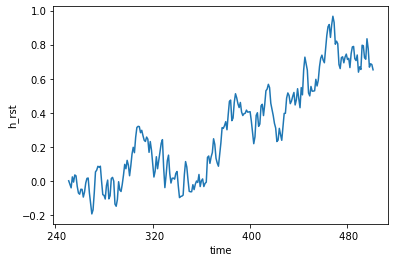

In [13]:
fig1, axs = plt.subplots(2,1,figsize=(12,4))
# h_rst_gl_a_raw_CL.plot(color='b')
# h_rst_gl_a_CL.plot(color='r')
axs[0].plot(np.arange(1850,2100+1,1),h_rst_gl_a_intp_TL,color='k')
axs[0].plot(yrs_TL,h_rst_gl_a_TL,color='r')
axs[1].plot(yrs_CL_raw,h_rst_gl_a_intp_CL,color='k')
axs[1].plot(yrs_CL,h_rst_gl_a_CL,color='r')

In [12]:
print(h_rst_gl_a_TH.sel(time='2000').values)
h_rst_gl_a_TH.sel(time='2000')

[-2.93849628]


<xarray.DataArray 'h_rst' (time: 1)>
array([-2.93849628])
Coordinates:
  * time     (time) object 2000-12-31 00:00:00